# **Z Boson Event Classification in Electron Collision Data**

**Introduction:**
Particle physics experiments at CERN involve the collision of high-energy electrons and positrons, leading to the production of various particles. Among these interactions, a critical process of interest is the production and subsequent decay of Z Bosons, which are fundamental particles with a mass of approximately 91.2 GeV/c². Identifying and studying Z Boson events in the electron collision data can provide valuable insights into fundamental interactions and validate existing theoretical models. In this project, we aim to apply machine learning techniques to classify Z Boson events based on their event characteristics, thereby contributing to particle physics research.

**Objective:**
The main objective of this project is to build a neural network-based classification model capable of identifying Z Boson events from electron collision data. By leveraging domain physics knowledge and extracting relevant features, we will train the model to distinguish Z Boson events from other di-electron interactions, background noise, and unrelated processes.

In [ ]:
from google.colab import files
files.upload()

In [32]:
#Importing appropriate Python libraries:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [33]:
data = pd.read_csv('/content/drive/MyDrive/Electron Data/dielectron.csv')
data

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.311320,10.531000,-57.29740,12.82020,-2.202670,2.177660,1,11.28360,-1.032340,-1.88066,-11.077800,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.152130,-0.579855,-5.11278,4.19242,-1.028420,-3.002840,-1,17.14920,-11.713500,5.04474,11.464700,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.480900,2.041680,22.72460,11.66100,1.420480,2.965600,1,15.82030,-1.472800,2.25895,-15.588800,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.512140,11.887100,63.86620,14.06190,2.218380,1.007210,1,25.12730,4.087860,2.59641,24.656300,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.952840,-14.622700,-59.61210,14.91790,-2.093750,-1.371540,-1,13.88710,-0.277757,-2.42560,-13.670800,2.44145,-2.423700,-1.684810,-1,2.74718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,146511,522575834,12.31310,-10.658000,5.164440,3.36858,11.84330,0.280727,2.690370,-1,1.80181,0.668609,-1.58437,0.537805,1.71967,0.307851,-1.171470,1,8.44779
99996,146511,522786431,18.46420,7.854990,15.133000,-7.08659,17.05020,-0.404510,1.092010,1,14.69110,-1.418020,-2.28117,-14.443500,2.68598,-2.383880,-2.126960,1,20.71540
99997,146511,522906124,4.18566,-3.273500,-0.308507,-2.59013,3.28801,-0.723075,-3.047630,1,72.81740,-11.074900,-9.28179,-71.369300,14.45010,-2.300410,-2.444050,-1,12.71350
99998,146511,523243830,54.46220,11.352600,11.880900,51.92400,16.43280,1.867800,0.808132,-1,8.58671,0.378009,3.07828,8.007050,3.10141,1.677170,1.448610,1,4.69670


In [34]:
data=data.dropna()
data.isna().sum()

Run      0
Event    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64

Text(0.5, 1.0, 'Correlations')

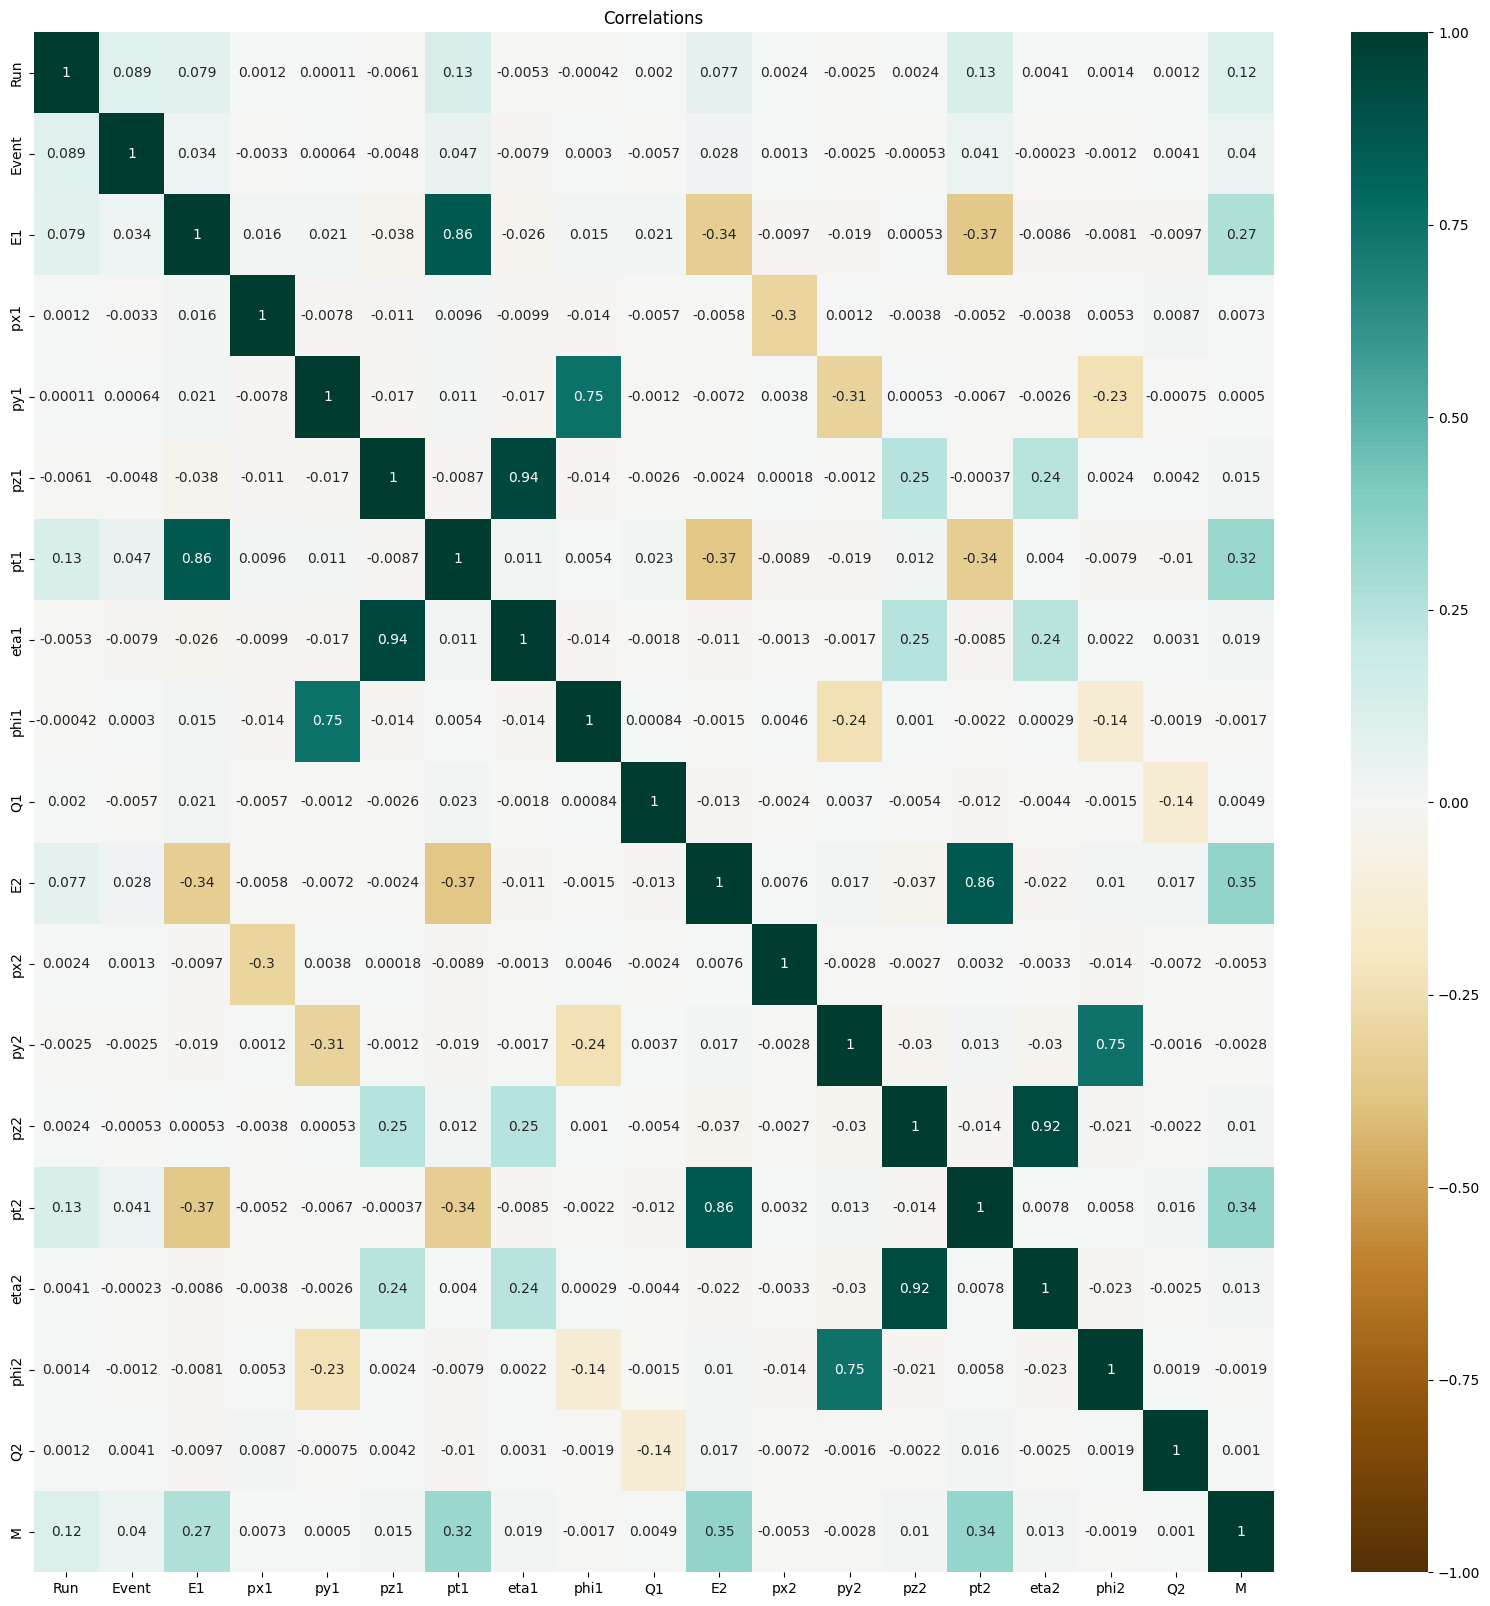

In [35]:
#Correlation matrix
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(data.corr(method='spearman'),vmin=-1,vmax=1,annot=True,cmap='BrBG')
heatmap.set_title('Correlations')
#We can clearly observe that the inviariant mass M is correlated with E1,E2 (Energies of electrons) and pt1, pt2
#transverse momenta but not to a degree that merits getting dropped

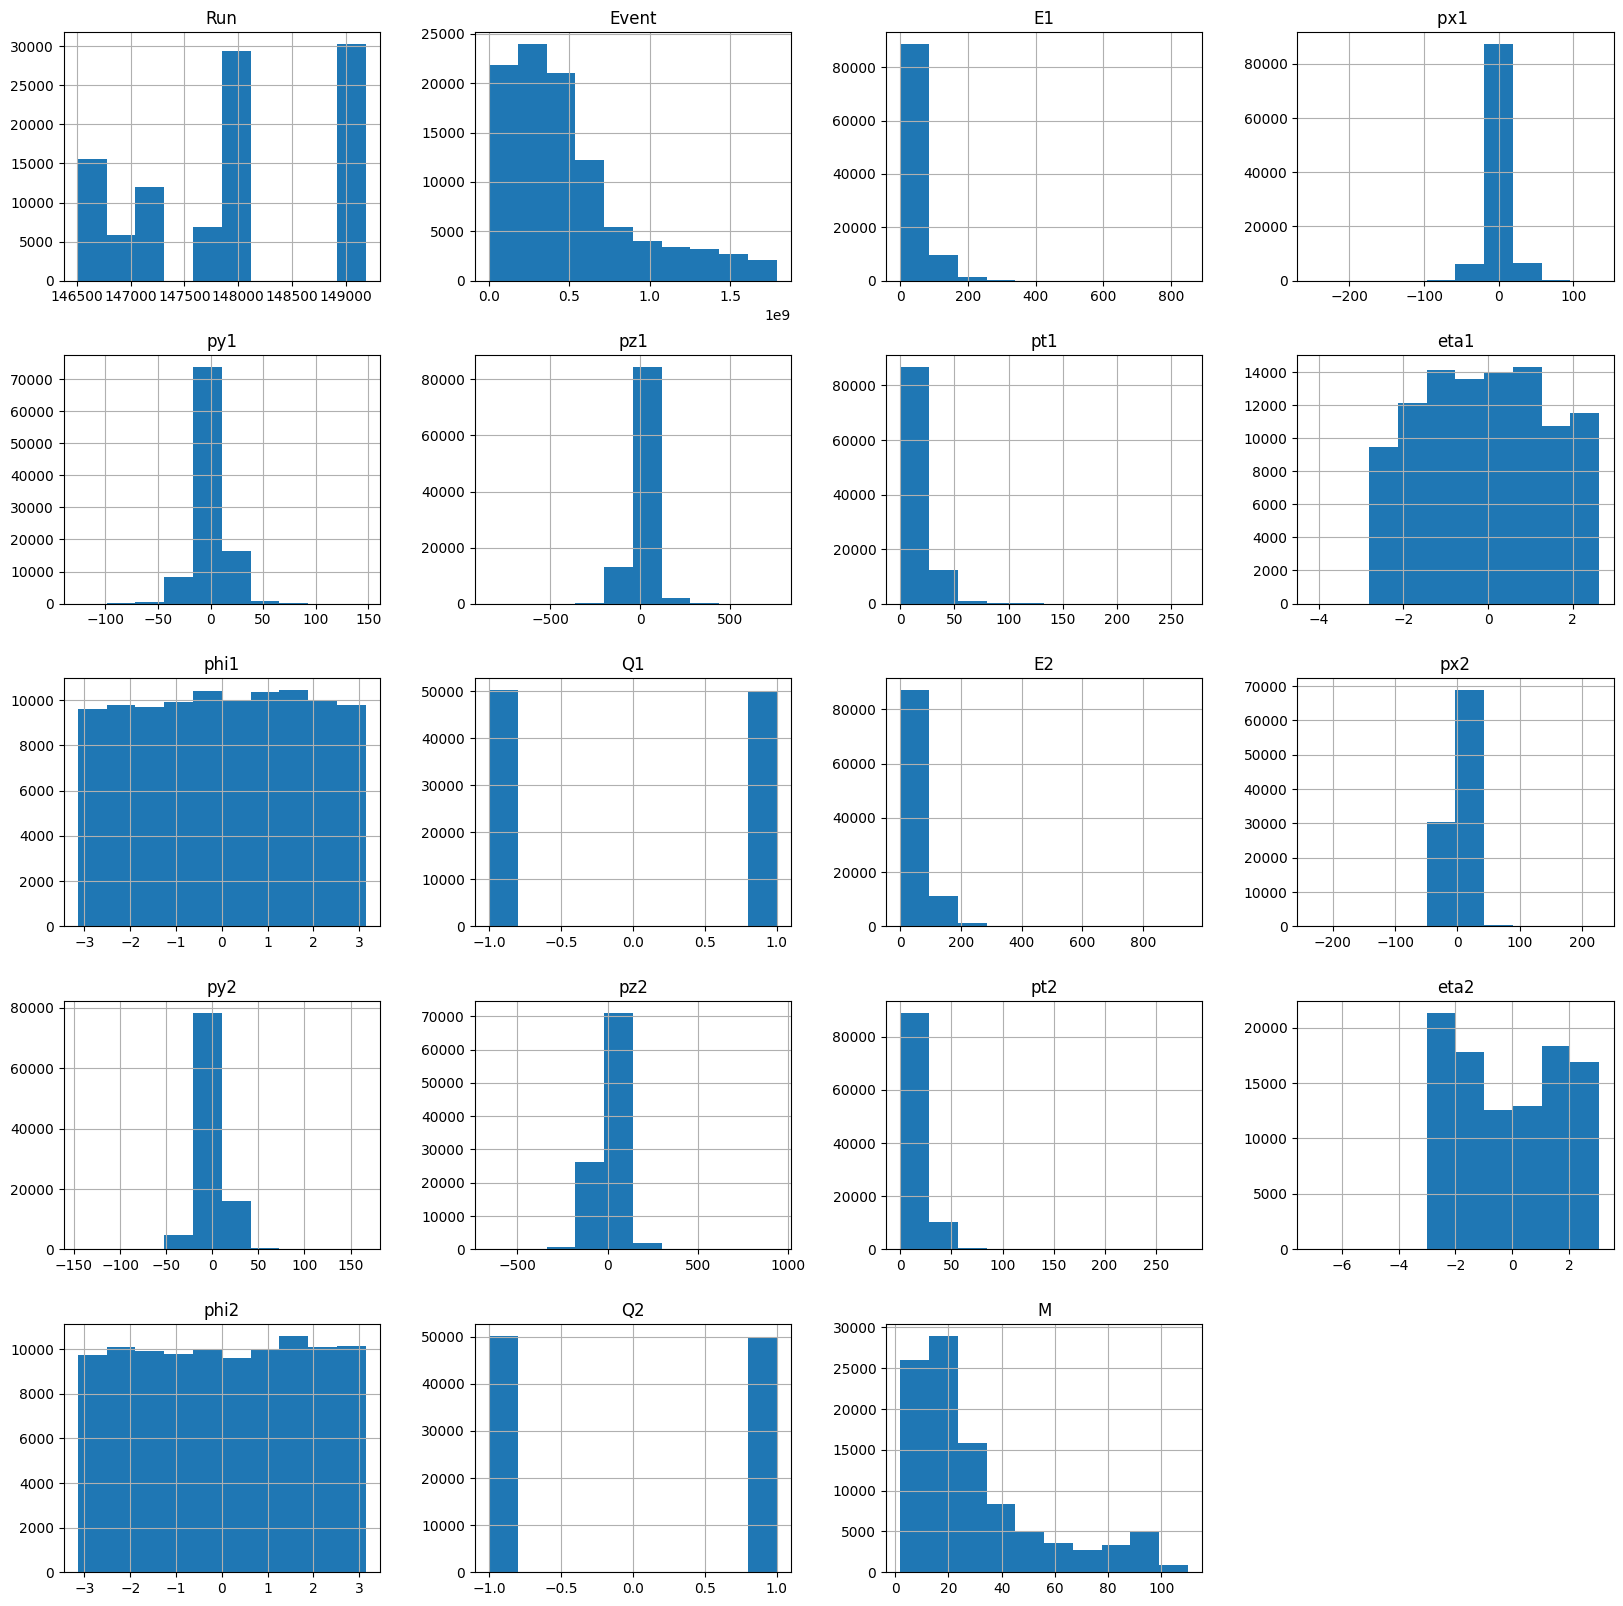

In [36]:
#Creating histogram for columns in dataset
data.iloc[:,0:19].hist(figsize=(20,20))
plt.show()
#We see no irregularities or unusual plots

In [37]:
#Eliminating irrelevant columns which can be disregarded such as run number, event number because they do not contribute
#to mass
data = data.drop(columns = ['Run','Event'])



## **Training a Neural Network on Invariant Mass as Target Feature**

In [ ]:
# intitiating a train / validate / test split of 70/ 15 /15
train, validate, test = \
              np.split(data.sample(frac=1, random_state=42),
                       [int(.7*len(data)), int(.85*len(data))])

In [ ]:
y_train, y_val, y_test = train['M'], validate['M'], test['M']
x_train, x_val, x_test = train.drop(columns = ['M']), validate.drop(columns = ['M']), test.drop(columns = ['M'])

In [ ]:
y_val

4062     10.04400
72871    43.34720
53625    42.29440
31128    37.27630
90922     6.85492
           ...   
54622    33.37440
60010     6.05207
26506    49.49730
34323    10.63750
1286     91.31700
Name: M, Length: 14987, dtype: float64

In [ ]:
x_train.shape[1]

16

In [ ]:
#Creating our Keras sequential model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(512, activation = "linear", input_shape = (x_train.shape[1],)),
  tf.keras.layers.Dense(256, activation = "relu"),
  tf.keras.layers.Dense(128, activation = "relu"),
  tf.keras.layers.Dense(64, activation = "relu"),
  tf.keras.layers.Dense(64, activation = "relu"),
  tf.keras.layers.Dense(1),
]
)
#Model is compiled with Adam optimizer so that we can reach a minimum for our loss function which for this example is
#MSE or mean squared error and MAE or Mean absolute error
model.compile(
  optimizer = tf.keras.optimizers.Adam(0.001),
  loss = 'mse',
  metrics = ['mse','mae'],
)

In [ ]:
#We fit our model with our validation with parameters which have been chosen to better display performance
history = model.fit(x_train,y_train, epochs=35, batch_size=256,validation_data=(x_val, y_val))

Epoch 1/35
274/274 [==============================] - 5s 13ms/step - loss: 98.9554 - mse: 98.9554 - mae: 5.9663 - val_loss: 17.8979 - val_mse: 17.8979 - val_mae: 2.9319
Epoch 2/35
274/274 [==============================] - 4s 13ms/step - loss: 22.7089 - mse: 22.7089 - mae: 3.0861 - val_loss: 69.2560 - val_mse: 69.2560 - val_mae: 5.2381
Epoch 3/35
274/274 [==============================] - 5s 18ms/step - loss: 20.2488 - mse: 20.2488 - mae: 2.7685 - val_loss: 6.7998 - val_mse: 6.7998 - val_mae: 1.8369
Epoch 4/35
274/274 [==============================] - 4s 13ms/step - loss: 12.0148 - mse: 12.0148 - mae: 2.2487 - val_loss: 9.6113 - val_mse: 9.6113 - val_mae: 2.0822
Epoch 5/35
274/274 [==============================] - 4s 13ms/step - loss: 12.2348 - mse: 12.2348 - mae: 2.2590 - val_loss: 5.7074 - val_mse: 5.7074 - val_mae: 1.6507
Epoch 6/35
274/274 [==============================] - 3s 12ms/step - loss: 9.0273 - mse: 9.0273 - mae: 1.9374 - val_loss: 4.0721 - val_mse: 4.0721 - val_mae: 1.4

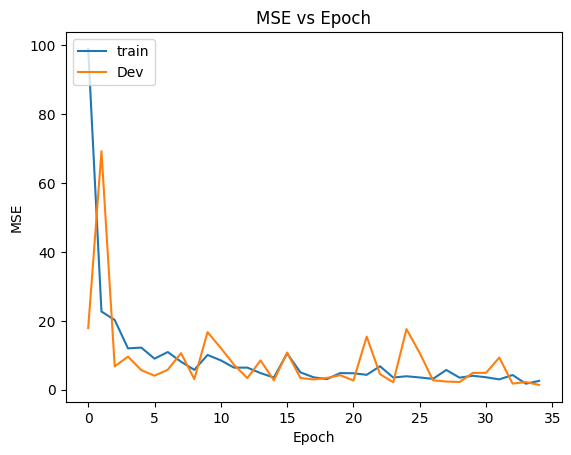

In [ ]:
#Plotting train vs test MSE
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('MSE vs Epoch')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'Dev'], loc='upper left')
plt.show()
#We can clearly see spikes which are a consequence of out Adam optimzer but we still see convergence

In [ ]:
#We can test out our model by making our prediction and taking a mean squared error of both sets
y_pred = model.predict(x_test)
mse(y_test,y_pred)

469/469 [==============================] - 1s 2ms/step


1.363000029164089

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9978628278628654

## **Classifiying Z-Boson Events on the mass of the collisions**

In [38]:
data

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,58.71410,-7.311320,10.531000,-57.29740,12.82020,-2.202670,2.177660,1,11.28360,-1.032340,-1.88066,-11.077800,2.14537,-2.344030,-2.072810,-1,8.94841
1,6.61188,-4.152130,-0.579855,-5.11278,4.19242,-1.028420,-3.002840,-1,17.14920,-11.713500,5.04474,11.464700,12.75360,0.808077,2.734920,1,15.89300
2,25.54190,-11.480900,2.041680,22.72460,11.66100,1.420480,2.965600,1,15.82030,-1.472800,2.25895,-15.588800,2.69667,-2.455080,2.148570,1,38.38770
3,65.39590,7.512140,11.887100,63.86620,14.06190,2.218380,1.007210,1,25.12730,4.087860,2.59641,24.656300,4.84272,2.330210,0.565865,-1,3.72862
4,61.45040,2.952840,-14.622700,-59.61210,14.91790,-2.093750,-1.371540,-1,13.88710,-0.277757,-2.42560,-13.670800,2.44145,-2.423700,-1.684810,-1,2.74718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12.31310,-10.658000,5.164440,3.36858,11.84330,0.280727,2.690370,-1,1.80181,0.668609,-1.58437,0.537805,1.71967,0.307851,-1.171470,1,8.44779
99996,18.46420,7.854990,15.133000,-7.08659,17.05020,-0.404510,1.092010,1,14.69110,-1.418020,-2.28117,-14.443500,2.68598,-2.383880,-2.126960,1,20.71540
99997,4.18566,-3.273500,-0.308507,-2.59013,3.28801,-0.723075,-3.047630,1,72.81740,-11.074900,-9.28179,-71.369300,14.45010,-2.300410,-2.444050,-1,12.71350
99998,54.46220,11.352600,11.880900,51.92400,16.43280,1.867800,0.808132,-1,8.58671,0.378009,3.07828,8.007050,3.10141,1.677170,1.448610,1,4.69670


In [39]:
data[(data['M'] > 90.2) & (data['M'] < 92.2)]

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
26,39.6056,-31.37060,-24.16940,0.568363,39.60150,0.014352,-2.485130,1,70.1602,49.296400,-7.873030,-49.29850,49.92110,-0.872527,-0.158371,-1,91.2461
241,49.4175,15.53970,-37.21420,-28.560600,40.32840,-0.659373,-1.175230,-1,41.9760,-11.224400,26.687700,30.39360,28.95200,0.916146,1.968920,1,90.6642
258,38.2560,-28.74440,18.45740,17.222300,34.16010,0.484934,2.570780,1,120.9300,40.702100,-16.129600,112.72600,43.78150,1.674640,-0.377298,-1,91.1323
354,43.5859,38.48370,12.82610,-15.944400,40.56490,-0.383584,0.321708,1,53.1714,-31.897500,-1.325890,42.52050,31.92510,1.097740,-3.100050,-1,92.0873
393,22.8097,1.28434,6.11731,-21.936500,6.25069,-1.968310,1.363850,1,95.9133,22.625800,0.323569,93.20590,22.62820,2.123180,0.014300,1,91.6660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99530,138.6360,29.05510,-4.23560,-135.491000,29.36220,-2.233880,-0.144758,1,14.7412,-4.871990,-0.273798,13.91010,4.87968,1.770120,-3.085450,1,90.2082
99733,57.1191,9.39445,27.47340,-49.188900,29.03520,-1.297830,1.241310,-1,36.7244,-7.204600,-26.435300,24.45300,27.39950,0.803255,-1.836870,1,90.4923
99748,60.9099,15.81230,-1.95666,-58.789100,15.93290,-2.016600,-0.123117,1,34.8476,-0.331235,6.690140,34.19770,6.69833,2.332900,1.620270,1,91.1191
99796,54.7702,40.67260,-36.45040,4.109680,54.61580,0.075176,-0.730706,1,38.7620,-23.802500,30.531100,1.94505,38.71320,0.050222,2.232980,-1,91.6077


In [40]:
data['Z_event'] = (data['M'] > 90.2) & (data['M'] < 92.2)

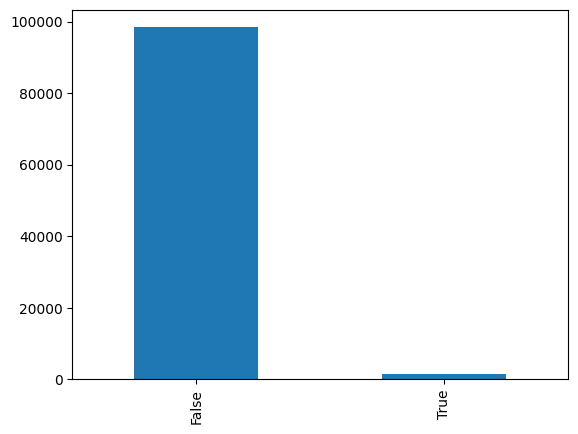

In [41]:
data['Z_event'].value_counts().plot(kind='bar')
plt.show()

In [42]:
df = data.copy()
df = df.drop(['M', 'Q1', 'Q2'], axis=1)
df

,E1,px1,py1,pz1,pt1,eta1,phi1,E2,px2,py2,pz2,pt2,eta2,phi2,Z_event
0,58.71410,-7.311320,10.531000,-57.29740,12.82020,-2.202670,2.177660,11.28360,-1.032340,-1.88066,-11.077800,2.14537,-2.344030,-2.072810,False
1,6.61188,-4.152130,-0.579855,-5.11278,4.19242,-1.028420,-3.002840,17.14920,-11.713500,5.04474,11.464700,12.75360,0.808077,2.734920,False
2,25.54190,-11.480900,2.041680,22.72460,11.66100,1.420480,2.965600,15.82030,-1.472800,2.25895,-15.588800,2.69667,-2.455080,2.148570,False
3,65.39590,7.512140,11.887100,63.86620,14.06190,2.218380,1.007210,25.12730,4.087860,2.59641,24.656300,4.84272,2.330210,0.565865,False
4,61.45040,2.952840,-14.622700,-59.61210,14.91790,-2.093750,-1.371540,13.88710,-0.277757,-2.42560,-13.670800,2.44145,-2.423700,-1.684810,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12.31310,-10.658000,5.164440,3.36858,11.84330,0.280727,2.690370,1.80181,0.668609,-1.58437,0.537805,1.71967,0.307851,-1.171470,False
99996,18.46420,7.854990,15.133000,-7.08659,17.05020,-0.404510,1.092010,14.69110,-1.418020,-2.28117,-14.443500,2.68598,-2.383880,-2.126960,False
99997,4.18566,-3.273500,-0.308507,-2.59013,3.28801,-0.723075,-3.047630,72.81740,-11.074900,-9.28179,-71.369300,14.45010,-2.300410,-2.444050,False
99998,54.46220,11.352600,11.880900,51.92400,16.43280,1.867800,0.808132,8.58671,0.378009,3.07828,8.007050,3.10141,1.677170,1.448610,False


In [43]:
Train, Validate, Test = \
              np.split(df.sample(frac=1, random_state=42),
                       [int(.7*len(df)), int(.85*len(df))])

In [44]:
Y_train, Y_val, Y_test = Train['Z_event'], Validate['Z_event'], Test['Z_event']
X_train, X_val, X_test = Train.drop(columns = ['Z_event']), Validate.drop(columns = ['Z_event']), Test.drop(columns = ['Z_event'])

In [45]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)


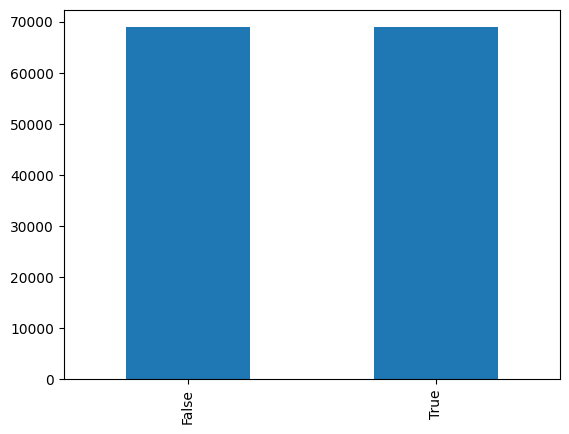

In [46]:
Y_train_resampled.value_counts().plot(kind='bar')
plt.show()

In [47]:
X_train_resampled

,E1,px1,py1,pz1,pt1,eta1,phi1,E2,px2,py2,pz2,pt2,eta2,phi2
0,28.586900,23.393300,14.677000,7.385900,27.616300,0.264357,0.560324,77.623000,-19.857300,-34.848100,-66.457700,40.108700,-1.278780,-2.088730
1,93.913200,-11.512500,16.422800,-91.746600,20.056000,-2.225390,2.182200,14.601300,-4.483480,0.453562,-13.888500,4.506360,-1.844060,3.040770
2,9.374080,-0.471430,-3.620150,8.633980,3.650720,1.595900,-1.700290,98.234000,-22.072700,14.270700,-94.652300,26.284200,-1.993130,2.567660
3,41.142300,8.046000,-0.589616,-40.343500,8.067580,-2.312580,-0.073150,134.146000,-32.355500,8.095940,-129.933000,33.353000,-2.069100,2.896410
4,2.803450,-2.790690,-0.214492,0.159465,2.798920,0.056943,-3.064880,233.336000,-38.400800,-63.625200,221.185000,74.315500,1.810920,-2.113820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137775,91.183008,-22.004960,46.975090,74.870148,52.036398,1.158187,2.017235,38.123489,20.122053,-28.525259,14.817119,34.987927,0.418161,-0.962295
137776,48.366255,-40.872877,-18.093758,-16.774962,45.017463,-0.364897,-2.727144,67.312130,40.434967,8.564326,-52.818909,41.360500,-1.073612,0.204019
137777,17.875946,8.171513,-7.603883,-9.155515,11.462743,-1.091790,-0.587818,143.006217,-35.103151,28.136153,135.495152,44.993976,1.837983,2.469000
137778,32.673844,-5.054607,6.825027,31.222161,9.216846,1.980611,2.339175,63.130949,14.722596,-6.981549,-60.455638,17.647465,-1.978487,-0.333766


In [73]:
#Creating our Keras sequential model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(512, activation = "linear", input_shape = (X_train_resampled.shape[1],)),
  tf.keras.layers.BatchNormalization(),
   tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(256, activation = "relu"),
   tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation = "relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(64, activation = "relu"),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid"),
]
)
#Model is compiled with Adam optimizer so that we can reach a minimum for our loss function which for this example is
#MSE or mean squared error and MAE or Mean absolute error
model.compile(
  optimizer = tf.keras.optimizers.Adam(0.001),
  loss = 'binary_crossentropy',
  metrics = ['accuracy'],
)

In [74]:
#We fit our model with our validation with parameters which have been chosen to better display performance
history = model.fit(X_train_resampled,Y_train_resampled, epochs=20, batch_size=256,validation_data=(X_val, Y_val))

Epoch 1/20
539/539 [==============================] - 13s 20ms/step - loss: 0.2851 - accuracy: 0.8866 - val_loss: 0.1837 - val_accuracy: 0.8814
Epoch 2/20
539/539 [==============================] - 12s 22ms/step - loss: 0.2024 - accuracy: 0.9273 - val_loss: 0.2510 - val_accuracy: 0.8561
Epoch 3/20
539/539 [==============================] - 12s 22ms/step - loss: 0.1789 - accuracy: 0.9376 - val_loss: 0.2287 - val_accuracy: 0.8874
Epoch 4/20
539/539 [==============================] - 12s 22ms/step - loss: 0.1699 - accuracy: 0.9423 - val_loss: 0.2400 - val_accuracy: 0.8876
Epoch 5/20
539/539 [==============================] - 11s 20ms/step - loss: 0.1615 - accuracy: 0.9459 - val_loss: 0.2193 - val_accuracy: 0.9037
Epoch 6/20
539/539 [==============================] - 11s 21ms/step - loss: 0.1573 - accuracy: 0.9481 - val_loss: 0.2233 - val_accuracy: 0.9013
Epoch 7/20
539/539 [==============================] - 12s 22ms/step - loss: 0.1561 - accuracy: 0.9486 - val_loss: 0.2184 - val_accuracy:

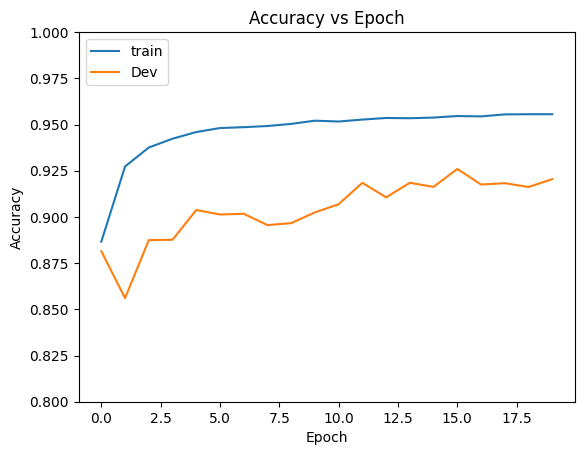

In [75]:
#Plotting train vs test accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.xlabel('Epoch')
plt.legend(['train', 'Dev'], loc='upper left')
plt.show()
#We can clearly see spikes which are a consequence of out Adam optimzer but we still see convergence

In [ ]:
X_train_resampled

In [66]:
from sklearn.metrics import accuracy_score

#We can test out our model by making our prediction and taking a mean squared error of both sets
Y_pred = model.predict(X_test)
Y_pred= (Y_pred >= 0.5)
accuracy_score(Y_test,Y_pred)

469/469 [==============================] - 1s 2ms/step


0.9374833199893248